**Importing necessary libraries**

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
from itertools import cycle, islice

**Reading data from the csv file using pandas and loading the data**

In [281]:
df_red = pd.read_csv('winequality-red.csv',sep=';')

In [282]:
df_white = pd.read_csv('winequality-white.csv',sep=';')

**Using shape, able to identify the size of the data frame which gives in the format of (rows,columns)**

In [283]:
df_red.shape

(1599, 12)

In [284]:
df_white.shape

(4898, 12)

**There are 4898 rows and 12 columns in white wine dataset**

**There are 1599 rows and 12 columns in red wine dataset**

**I AM CONSIDERING RED WINE DATSET**

**Identifying the data types of all the columns in the dataframe**

In [285]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Using head function, identifying the first 5 rows of the data frame**

In [286]:
df_red.head(5) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Using head function, identifying the last 5 rows of the data frame**

In [287]:
df_red.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


**Using sample and specifying n = 5 ,Looking at a random sample of 5**

In [288]:
df_red.sample(n=5, random_state=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [290]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [291]:
import seaborn as sns

In [292]:
corr = df_red.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Text(0.5, 1.0, 'Correlation between variables')

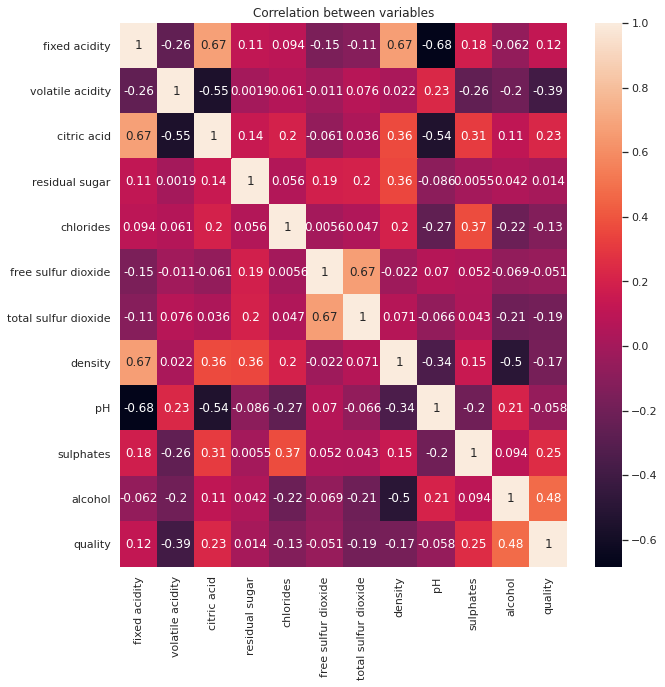

In [293]:
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between variables')

**As there less Correleation with free suplhur dioxide, ph and residual sugar. I would like to drop those features.**

In [294]:
df_red = df_red.drop(['pH','residual sugar','free sulfur dioxide'],axis=1)

In [295]:
y = df_red.quality
X = df_red.drop('quality',axis = 1)

In [296]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [299]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [300]:
coeff_df = pd.DataFrame({'Coefficient': lr.coef_})
coeff_df.index = [['fixed acidity', 'volatile acidity', 'citric acid', 
                    'chlorides',  'total sulfur dioxide', 'density', 'sulphates','alcohol']]
coeff_df

,Coefficient
fixed acidity,0.054349
volatile acidity,-0.215752
citric acid,-0.019334
chlorides,-0.066396
total sulfur dioxide,-0.093512
density,-0.040263
sulphates,0.146065
alcohol,0.281208


In [301]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test
                                                                     , lr_predict)))

Mean Absolute Error: 0.521652111858128
Mean Squared Error: 0.4472012402257983
Root Mean Squared Error: 0.6687310671905399


**The quality of wine is a qualitative variable and that is the reason why the algorithm did not do good.**

In [302]:
df_red = pd.read_csv('winequality-red.csv',sep=';')

**next we shall create a new column called quality _score. This column will split the values into**
* **1,2,3 --> Bad**
* **4,5,6,7 --> Average**
* **8,9,10 --> Excellent**

In [303]:
column_name = 'quality_score'
df_red.loc[(df_red['quality'] >= 1)  & (df_red['quality'] <= 3), 'quality_score'] = 'Bad'
df_red.loc[(df_red['quality'] > 3)  & (df_red['quality'] <= 7), 'quality_score'] = 'Average'
df_red.loc[(df_red['quality'] > 7)  & (df_red['quality'] <= 10), 'quality_score'] = 'Excellent'

In [304]:
df_red['quality_score'].value_counts()

Average      1571
Excellent      18
Bad            10
Name: quality_score, dtype: int64

In [305]:
y = df_red.quality_score
X = df_red.drop('quality_score',axis = 1)

In [306]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [307]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

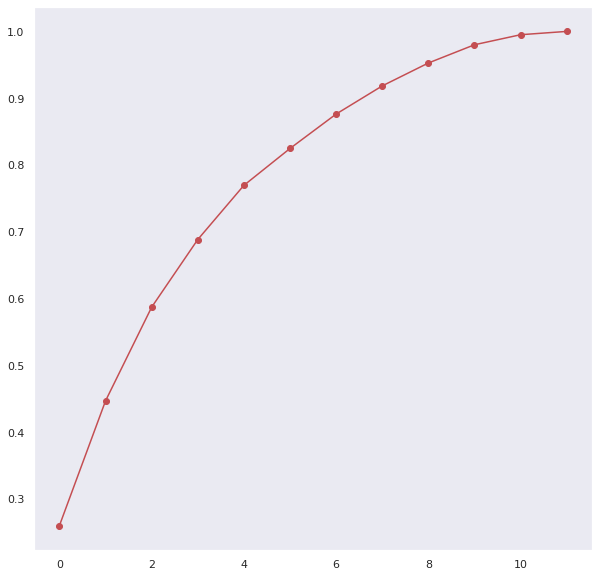

In [308]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [309]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X)

In [310]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

**Logistic Regression**

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lg = LogisticRegression()
lg.fit(x_train, y_train)
lg_predict = lg.predict(x_test)

In [312]:
lg_conf_matrix = confusion_matrix(y_test, lg_predict)
lg_acc_score = accuracy_score(y_test, lg_predict)
print(lg_conf_matrix)
print(lg_acc_score*100)

[[392   0   0]
 [  3   1   0]
 [  1   0   3]]
99.0


**DecisionTree Classifier**

In [313]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [314]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[391   1   0]
 [  3   1   0]
 [  4   0   0]]
98.0


**NaiveBayes**

In [315]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

In [316]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[392   0   0]
 [  3   1   0]
 [  3   0   1]]
98.5


**Random Forest Classifier**

In [317]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [318]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[392   0   0]
 [  4   0   0]
 [  4   0   0]]
98.0


**SVM Classifier**

In [319]:
from sklearn.svm import SVC
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

In [320]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[392   0   0]
 [  4   0   0]
 [  4   0   0]]
98.0


In [321]:
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(x_train, y_train)
rbf_svc=rf.predict(x_test)

In [322]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[392   0   0]
 [  4   0   0]
 [  4   0   0]]
98.0


**The same accuracy and we can see that the SVC and the Random Forest give us good prediction accuracy for the Wine Classification problem. We can further improve accuracy by fine-tuning the parameters of each classifier.**